In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
#from pathlib import Path #wss_niet nodig

In [2]:
#test of je in de juiste directory zit
path = Path('C:/Users/simon/Pictures/UGent/Calcium_Oxalaat')
print(path.is_dir())
print(path.exists())
print(path)

True
True
C:\Users\simon\Pictures\UGent\Calcium_Oxalaat


In [14]:
#create dataset, model and learn
from fastai.vision.all import *
path = Path('C:/Users/simon/Pictures/UGent/Calcium_Oxalaat')

def is_CaOxd(x): return (x[2] == "d")
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=1,
    label_func=is_CaOxd, item_tfms=Resize(224),bs=16, num_workers=0)

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.991540,0.563897,0.300000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.492593,0.609964,0.300000,00:00
1,0.515657,0.630091,0.300000,00:00
2,0.435645,0.443065,0.300000,00:00
3,0.343636,0.279645,0.100000,00:00
4,0.309703,0.176572,0.100000,00:00
5,0.273292,0.147211,0.100000,00:00
6,0.268347,0.136903,0.100000,00:00
7,0.237641,0.127432,0.100000,00:00


In [47]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.027482,0.286411,0.100000,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.002407,0.334847,0.100000,00:00


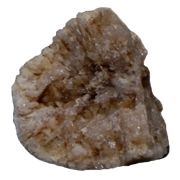

In [17]:
#### geef een voorbeeld image aan het systeem ###
#class voor foto's, nodig voor image processing & ai-verwerking
img = PILImage.create('C:/Users/simon/Downloads/d.jpg')
#controleer of het de juiste foto is
img.to_thumb(224)

In [18]:
learn.predict(img)

('True', tensor(1), tensor([0.0287, 0.9713]))

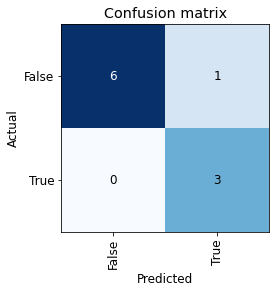

In [19]:
#confusion matrix of the validation set
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

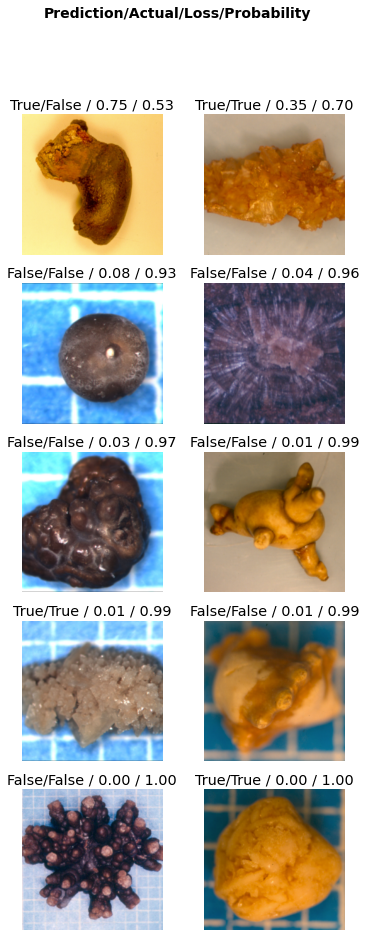

In [20]:
#show the mistakes
doc(plot_top_losses)
interp.plot_top_losses (10, nrows=5)

In [21]:
#export the model in the current directory
learn.export()

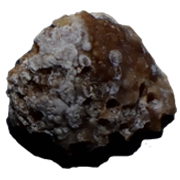

In [5]:
# gebruik het convolutional neural net
# geef een voorbeeldfoto
img = PILImage.create('C:/Users/simon/Downloads/m.jpg')
#controleer of het de juiste foto is
img.to_thumb(224)

In [6]:
#used this and somehow the model won't run without clarifying this function. Meaning of the function is not used so you can code something random
def is_CaOxd(x): return (x[2] == "d")

#saved model 'is image a CaOxDi?' (predicted accuracy: 90%)
model = load_learner('C:/Users/simon/Pictures/UGent/is_CaOxDi.pkl')
model.predict(img)

('False', tensor(0), tensor([0.7277, 0.2723]))